# CAI Lab Session 7: Network analysis

In this session you will:

- learn about the `igraph` package for analyzing networks
- compute several descriptive measures of networks
- work on several network models seen in the theory class

## 1. Introduction

In this session we will introduce the `igraph` software package for network analysis. The accompanying notebook `igraph.ipynb` contains examples on how to generate, plot, and compute several descriptive measures over graphs in an easy manner.
Please look at it and make sure you understand what is going on. Once you are familiar with igraph's functionality, you can go on to solve the following tasks.

## 2. Analyzing network models

In class you have seen three main random network models:

**Erdös-Rényii model (ER model).**
The ER model takes two parameters:
$n$, the number of vertices in the resulting network, and
$p$, the probability of having an edge between any two pairs of nodes.
A graph following this model is generated by connecting pairs of vertices with probability $p$, independently for each pair of vertices.

**Watts-Strogatz model (WS model).**
The WS model takes two parameters as well:
$n$, the number of vertices in the resulting network, and
$p$, the probability of rewiring the edges in the initial network.
A graph following this model is generated by initially laying all nodes out in a circle, and connecting each node to its four closest nodes. After that, we randomly reconnect each edge with probability $p$.

**Barabasi-Albert model (BA model).**
The BA model takes two parameters:
$n$, the number of vertices in the resulting network, and
$m$, the number of edges a _new_ vertex brings to attach itself to existing nodes.
A graph in this model is generated by adding new nodes according to the _preferential attachment principle_ until the
resulting graph has the desired size.


Your task is to generate the following plots using `igraph`: 

1. Plot the clustering coefficient and the average shortest-path as a function of the parameter $p$ of the WS model.
2. Plot the average shortest-path length as a function of the network size of the ER model.
3. Plot a histogram of the degree distribution of a BA network. What distribution does this follow? Can you describe it?

For option (1), notice that in order to include both values --- average shortest path and clustering coefficient --- in the same figure, the clustering coefficient and the average shortest-path values are scaled to be within the range $[0,1]$. This is achieved by dividing the values by the value obtained at the left-most point, that is, when $p=0$.

For option (2), you will have to experiment with appropriate values of $p$ which may depend on the parameter $n$. You will notice that for large values of $n$ your code may take too long, compute values for $n$ that are reasonable for you. Also, make sure that you chose values for $p$ that result (with high probability) in connected graphs. To achieve this, you can use a result from [this famous paper](https://snap.stanford.edu/class/cs224w-readings/erdos60random.pdf) stating (in the following, think of $\epsilon$ as a small positive real number):

- If $p < \frac{(1-\epsilon)\ln n}{n}$ then a graph in $G(n, p)$ will almost surely contain isolated vertices, and thus be disconnected
- If $p > \frac{(1+\epsilon)\ln n}{n}$ then a graph in $G(n, p)$ will almost surely be connected

For option (3), choose a network that is large enough so that results are what is expected from this model.

In [6]:
import sys
!pip3 install igraph --user
!pip3 install pycairo --user
import igraph
import pandas as pd
from igraph import Graph
import random
from IPython import display
from igraph import plot
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt, ticker as mticker
import altair as alt
from sympy import symbols, Eq, solve
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
alt.data_transformers.disable_max_rows() #we delete the upper bound of entries in altair
random.seed(10)

## Plot the clustering coefficient and the average shortest-path as a function of _p_ of the WS model

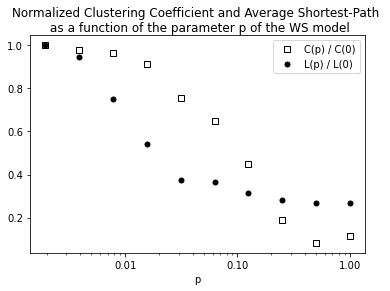

In [2]:
# Compute the clustering coefficient and average shortest-path values obtained at the left-most point (when p=0)
watts = Graph.Watts_Strogatz(1,100,2,0)
clustering_coeff_norm = watts.transitivity_undirected()
avg_shortest_path_norm = watts.average_path_length()

# Compute the normalized clustering coefficient and average shortest-path values for different p values
clustering_coeff = []
avg_shortest_path = []
p_value = []
p = 1/pow(2,9)
while p <= 1:
    watts = Graph.Watts_Strogatz(1,100,2,p)
    clustering_coeff.append(watts.transitivity_undirected()/clustering_coeff_norm)
    avg_shortest_path.append(watts.average_path_length()/avg_shortest_path_norm)
    p_value.append(p)
    p *= 2

# Plot the results
plt.plot(p_value, clustering_coeff, 'ks', markerfacecolor='none', label = "C(p) / C(0)")
plt.plot(p_value, avg_shortest_path, 'k.', markersize = 10, label = "L(p) / L(0)")
plt.title("Normalized Clustering Coefficient and Average Shortest-Path \n as a function of the parameter p of the WS model", wrap=True)
plt.legend(loc = 0)
plt.xlabel("p")
plt.xscale("log")
ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.ScalarFormatter())
plt.show()

## Plot the average shortest-path length as a function of the network size of the ER model

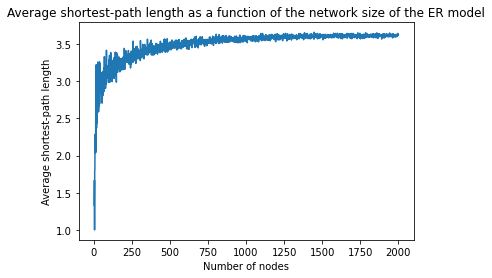

In [13]:
# Set n value
n = 2000
# Create list to save results
list_erdos = []
x = []
y = []
z = []
# Compute average shortest-path for each size from 0 to n
for i in range(1, n):
    # Recompute p value
    p = (1 + 1e-08) * np.log(i)/i + 0.001
    # Create graph
    erdos = Graph.Erdos_Renyi(i,p)
    # Compute average shortest-path and save it
    list_erdos.append([i, erdos.diameter(), erdos.average_path_length()])
# Plot the results
for pair in list_erdos:
    x.append(pair[0])
    y.append(pair[1])
    z.append(pair[2])
plt.plot(x, z)
plt.xlabel("Number of nodes")
plt.ylabel("Average shortest-path length")
plt.title("Average shortest-path length as a function of the network size of the ER model")
plt.show()

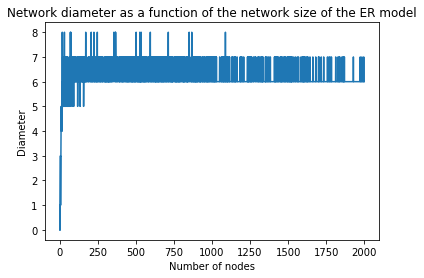

In [14]:
plt.plot(x, y)
plt.xlabel("Number of nodes")
plt.ylabel("Diameter")
plt.title("Network diameter as a function of the network size of the ER model")
plt.show()

## Plot a histogram of the degree distribution of a BA network. What distribution does this follow? Can you describe it?

In [7]:
# Create graph
barabasi = Graph.Barabasi(10000000,1)
degree = barabasi.degree()
df = pd.DataFrame({
    'degree': degree,
})
df = pd.DataFrame({'count' : df.groupby( ['degree'] ).size()}) #group by
df = df.sort_values(by=['count'], ascending = False).reset_index()
df.head()
print(df)
source = pd.DataFrame({
    'x': range(1,len(df)+1),
    'count': df['count']
})

     degree    count
0         1  5999821
1         2  2001750
2         3   856062
3         4   427809
4         5   237755
..      ...      ...
188     179        1
189     182        1
190     185        1
191     141        1
192     792        1

[193 rows x 2 columns]


In [8]:
# Plot Barabasi graph nodes' degree distribution
alt.Chart(source).mark_bar().encode(
    x = alt.X('x', scale=alt.Scale(domainMin= 0, domainMax=len(df)), axis = alt.Axis(title= "Degree of node")),
    y='count:Q',
).properties(
    title = "Whole Barabasi graph nodes' degree distribution"
)

alt.Chart(...)

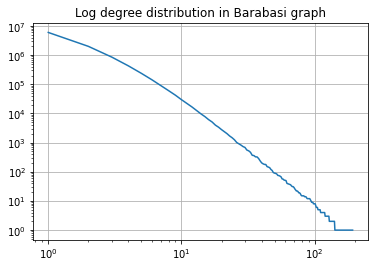

In [9]:
# Plot log scale
plt.loglog(range (1,len(df)+1), df['count'])
plt.grid (True)
ax = plt.gca() #to do the posterior work
plt.title("Log degree distribution in Barabasi graph")
plt.show()

In [10]:
# Compute powerlaw
line = ax.lines[0]
x_data = line.get_xdata()
y_data = line.get_ydata()
print("Get x1 and y1:")
x1 = np.log10(x_data[1])
y1 = np.log10(y_data[1])
print("log(x1) =", x1)
print("log(y1) =", y1)
print("Get x2 and y2:")
x2 = np.log10(x_data[100])
y2 = np.log10(y_data[100])
print("log(x2) =", x2)
print("log(y2) =", y2)

Get x1 and y1:
log(x1) = 0.3010299956639812
log(y1) = 6.301409837179207
Get x2 and y2:
log(x2) = 2.0043213737826426
log(y2) = 0.9030899869919435


In [11]:
a, c = symbols('a c')
eq1 = Eq(x1*a+c-y1,0)
eq2 = Eq(x2*a+c-y2,0)
sol = solve ((eq1,eq2), (a,c))
a = sol[a]
print(sol[c])
c = pow(10, sol[c])
print ("a =", a, "c =", c)

7.25547807351913
a = -3.16934607873721 c = 18008522.1146220


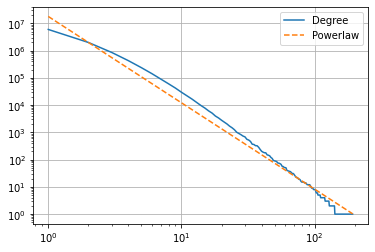

R2:  0.5576623383249053
R2 from observation num 100:  0.6802744508120535


In [12]:
# Plot log scale and powerlaw and compute R squared
plt.loglog(source['x'], source['count'], label = "Degree")
y = c*source['x']**a
plt.plot(source['x'], y, linestyle = '--', label = "Powerlaw")
plt.legend()
plt.grid (True)
ax = plt.gca() #to do the posterior work
plt.show()
y_true = source['count']
print("R2: ", r2_score(y, y_true))
print("R2 from observation num 100: ", r2_score(y[100:], y_true[100:]))

## 4. Rules of delivery

- _Rules:_ Same rules as in previous labs apply.

- _To deliver:_ Please deliver your code and a brief report (2-3 pages max.) describing your results.

- _Procedure:_ Submit your work through the [raco](http://www.fib.upc.edu/en/serveis/raco.html). There will be a `Practica` open for each report.

- _Deadline:_ Work must be delivered within **2 weeks** from the lab.  Late deliveries risk being penalized or not accepted at all. If you anticipate problems with the deadline, tell me as soon as possible.